#### Lineage Divergence Alpha

The parameter lineage_divergence_alpha determines how much the loss from lineage_divergence effects a sequence's fitness. Because it depends on the number of lineages, we test it independantly here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from divergence_function_module import *

In [2]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
test_cases = 10

# To pass into the test function
kwargs = {
    'cnn_model_path': cnn_model_path,
    'masked_sequence': masked_sequence,
    'target_expressions': target_expressions,
    'precision': precision,
    'verbose': verbose,
}

lineage_divergence_alpha_range = np.linspace(0.1, 1, test_cases, dtype=float)
lineage_range = np.linspace(1, 10, test_cases, dtype=int)

In [3]:
results_df, infill_histories = test_divergence(lineage_divergence_alpha_range, lineage_range=lineage_range, **kwargs)

Processing combinations: 100%|██████████| 300/300 [48:53<00:00,  9.78s/it, Elapsed=2933.96s, ETA=1418.08min] 


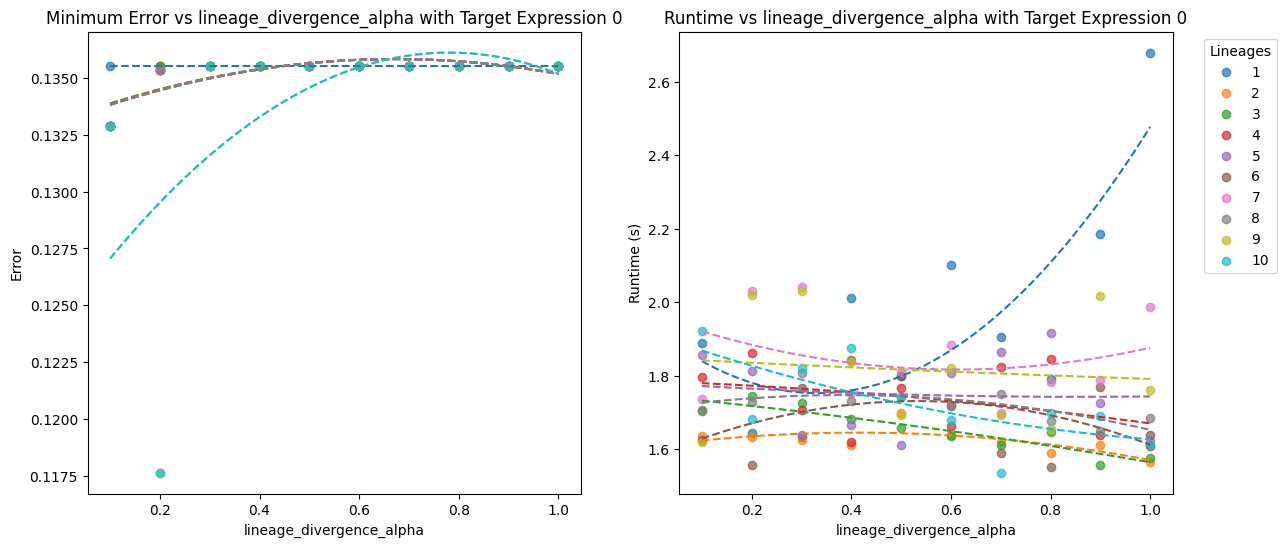

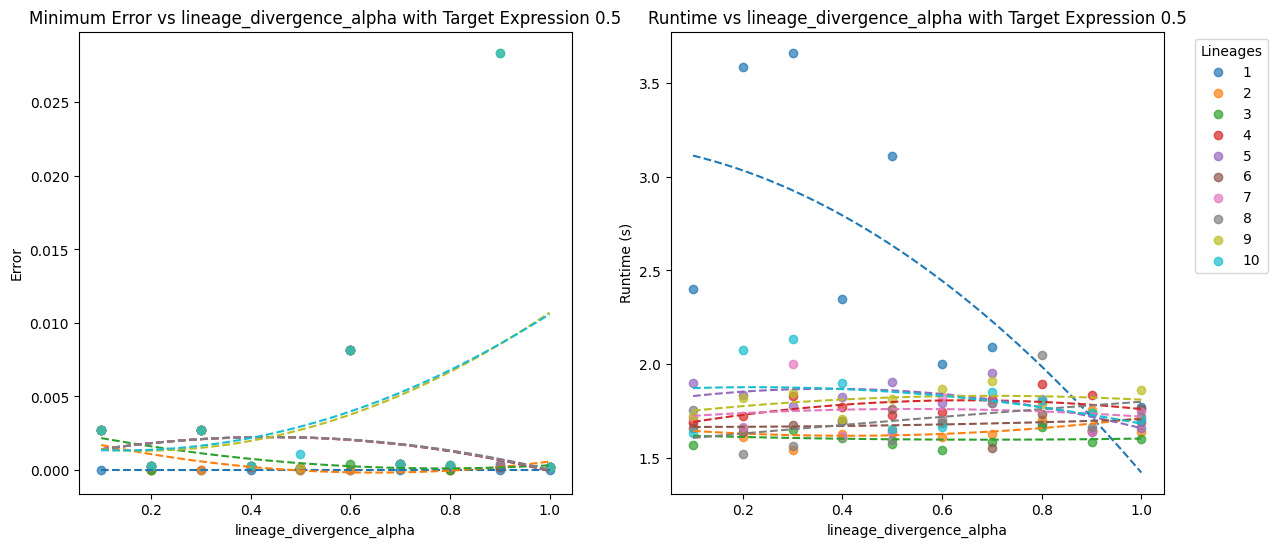

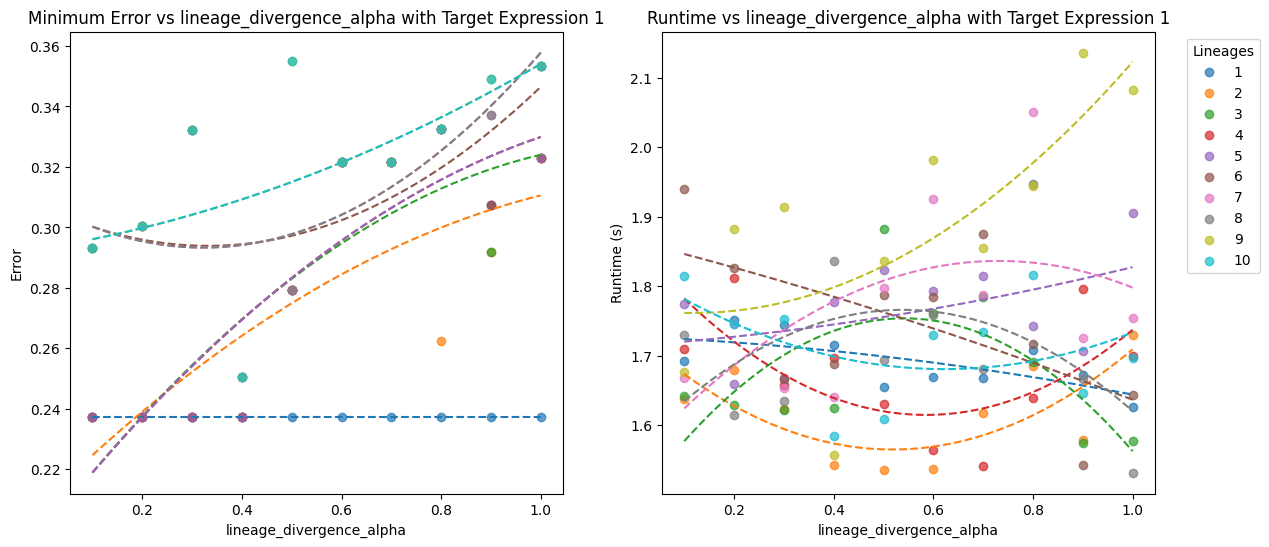

In [4]:
# Showing the distribution of results for each target expression, number of lineages and lineage divergence alpha

for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'lineage_divergence_alpha', polynomial_degree=2)

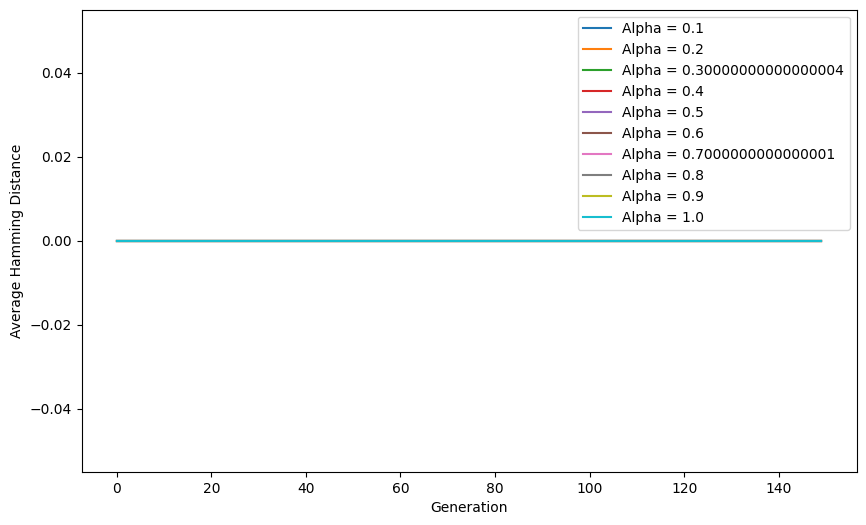

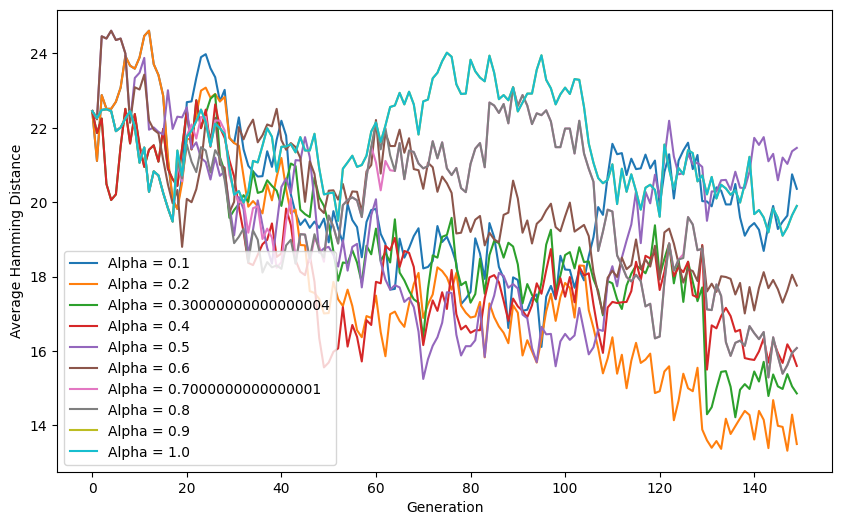

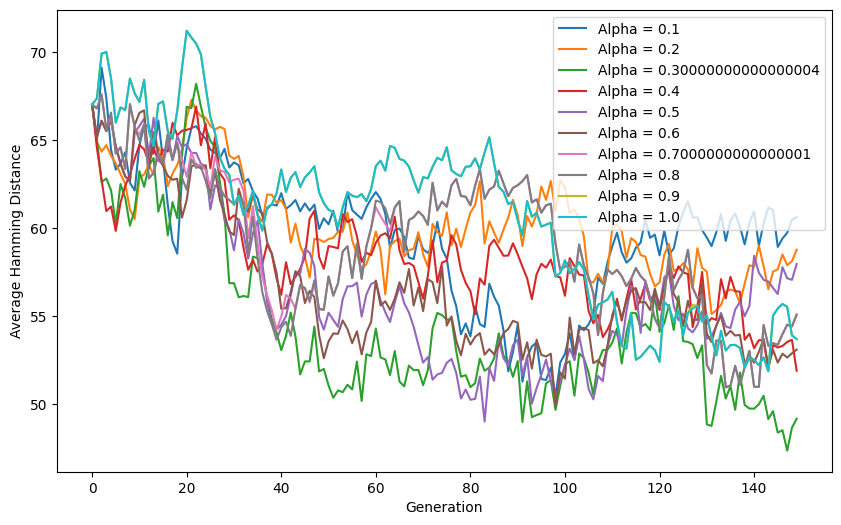

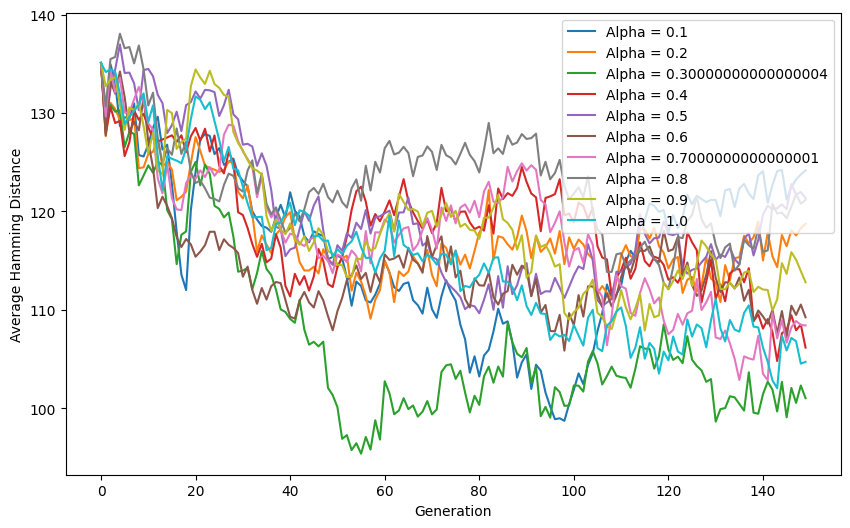

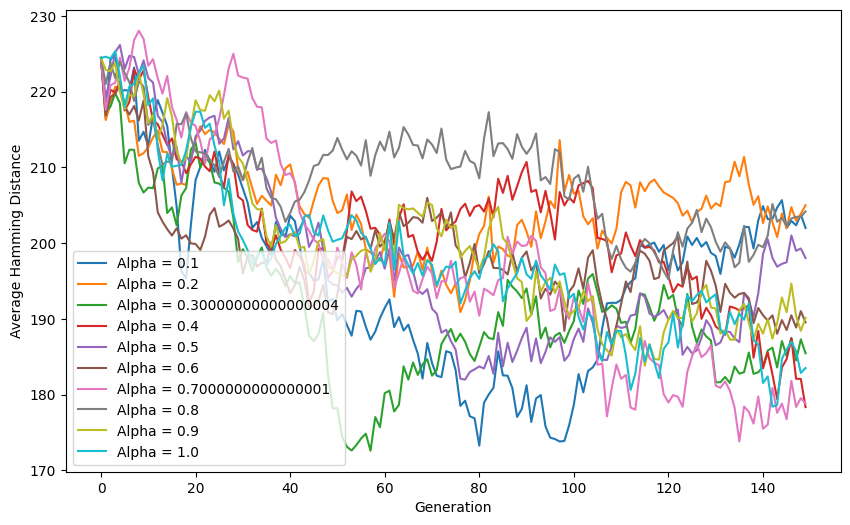

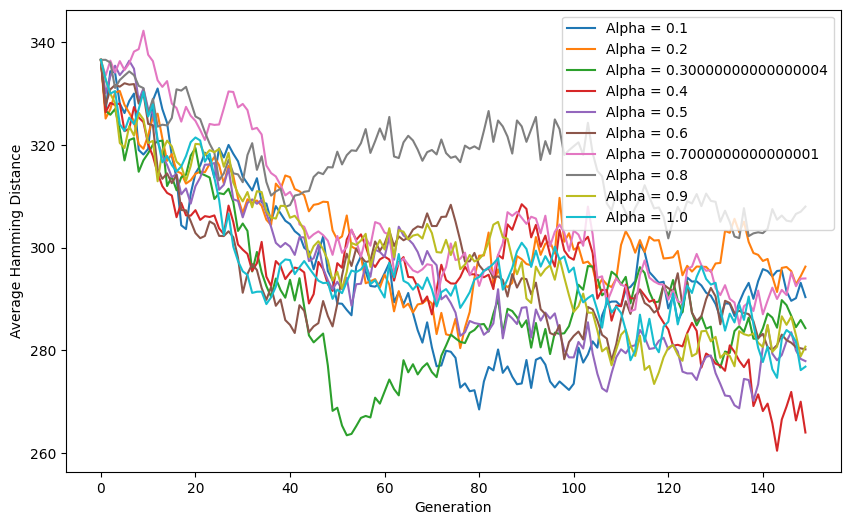

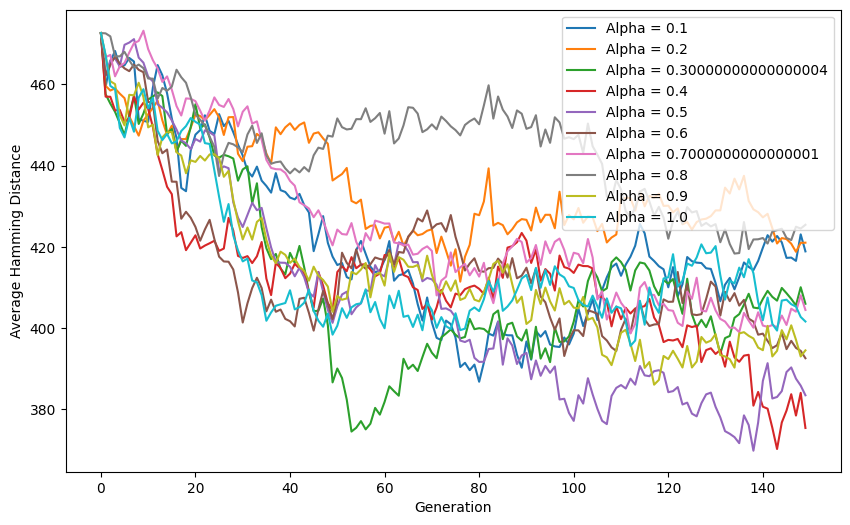

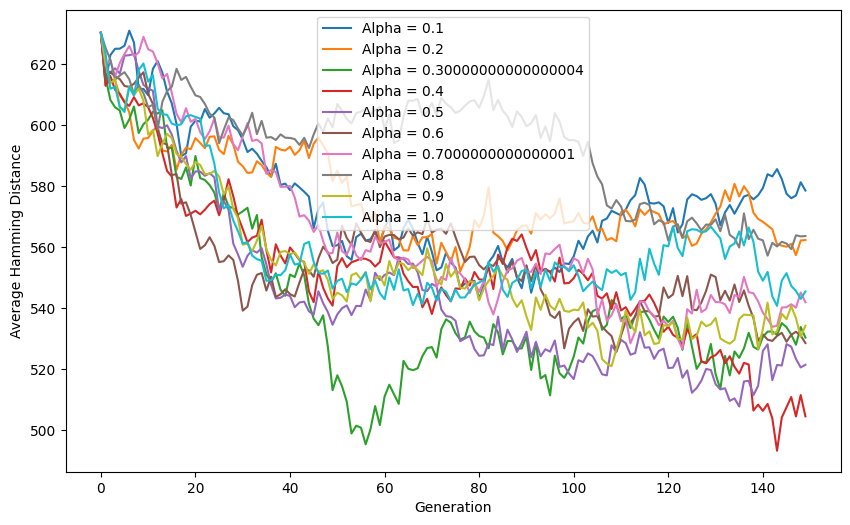

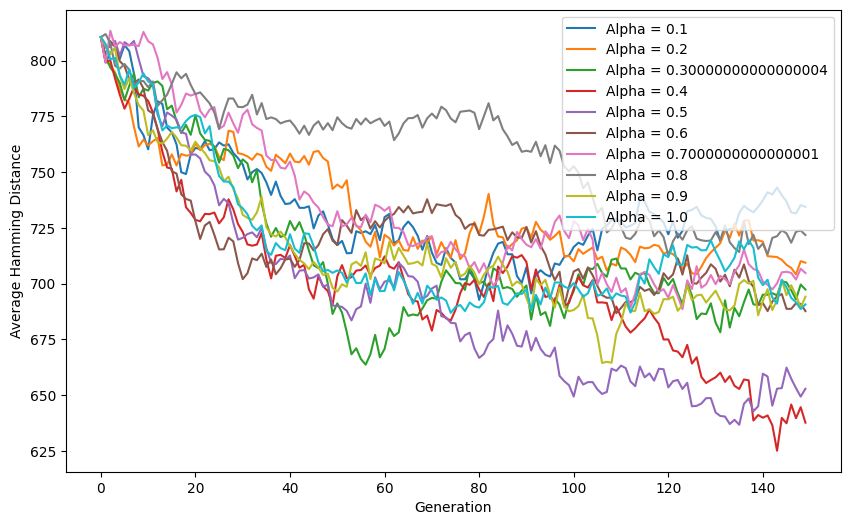

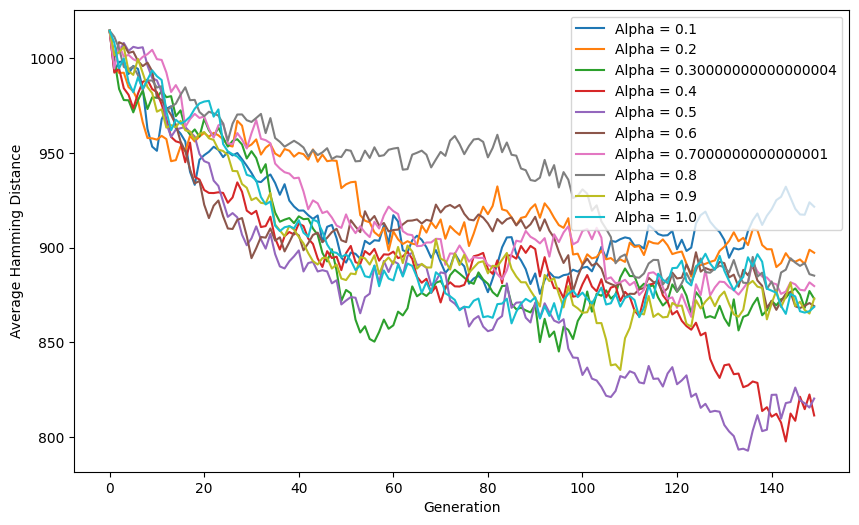

In [5]:
# For target_expression 0
target_expression = 0

for lineages in lineage_range:
    data = []
    for lineage_divergence_alpha in lineage_divergence_alpha_range:
        infill_history = infill_histories[lineages][target_expression][lineage_divergence_alpha]
        data.append(calculate_intra_lineage_hamm(infill_history))
    plot_intra_hamm_comparison(data, lineage_divergence_alpha_range)

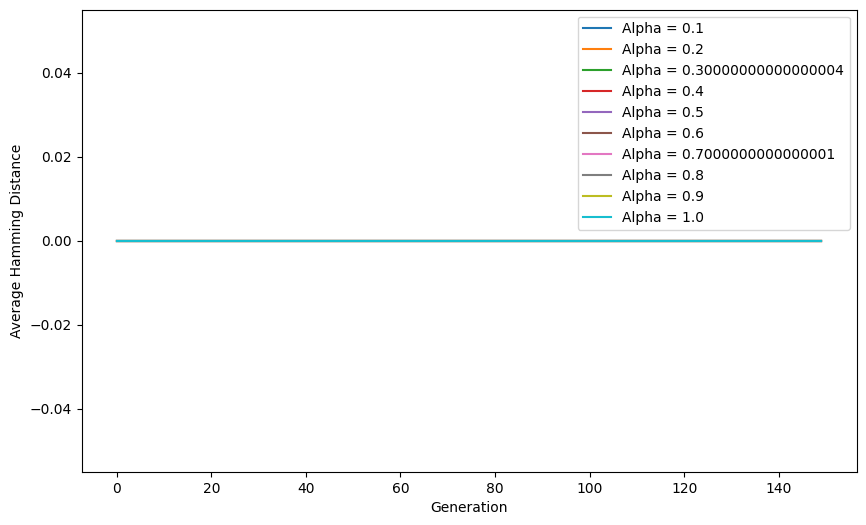

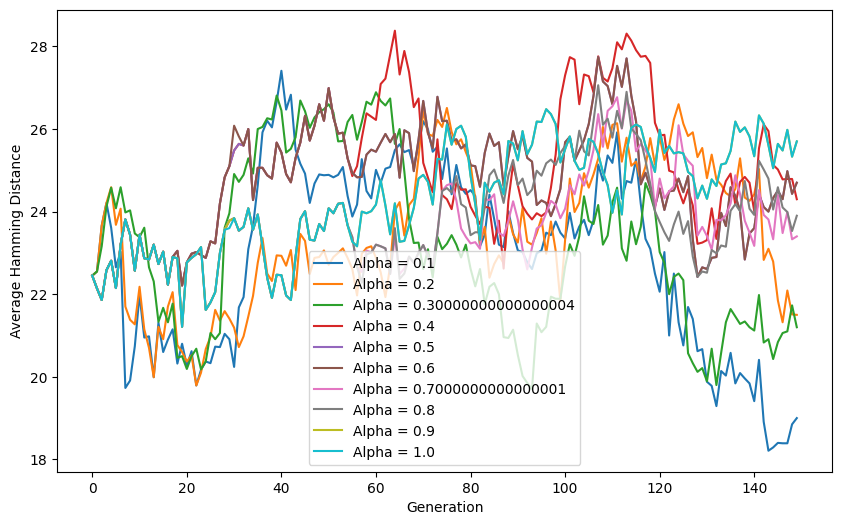

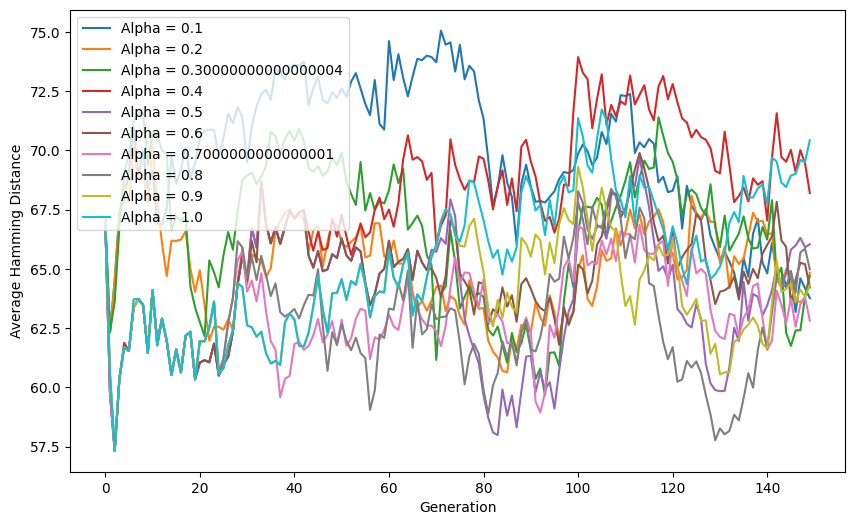

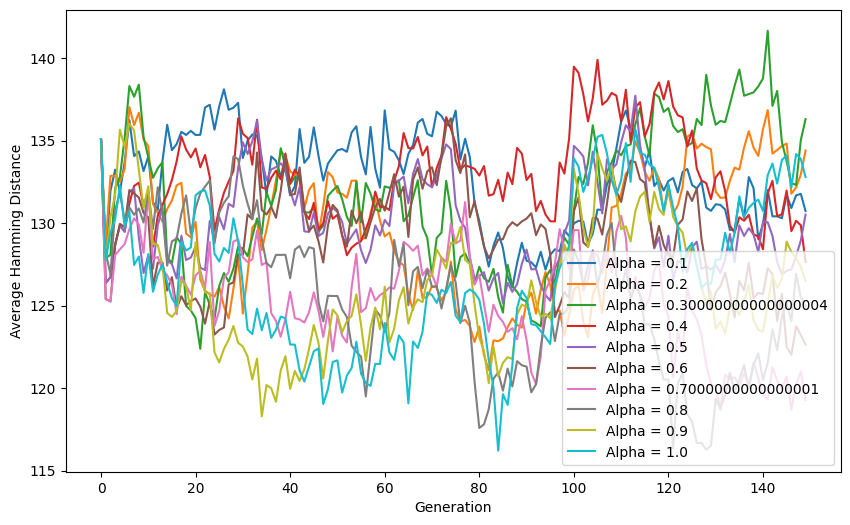

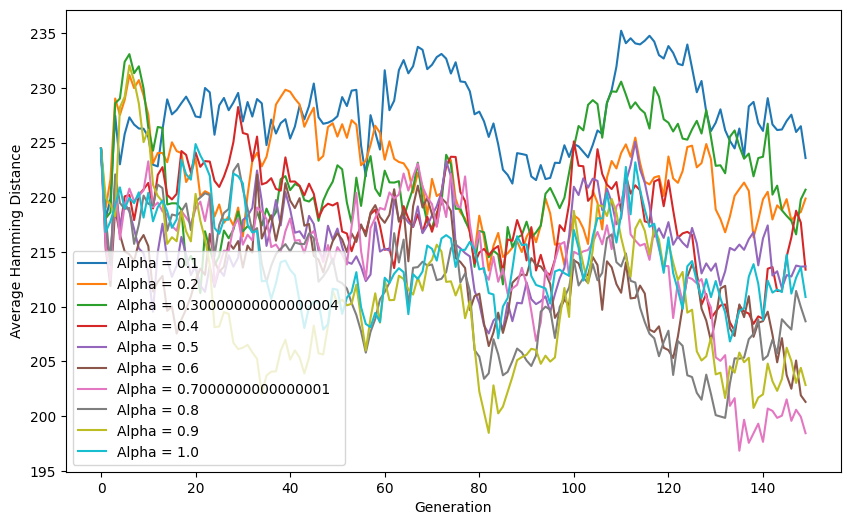

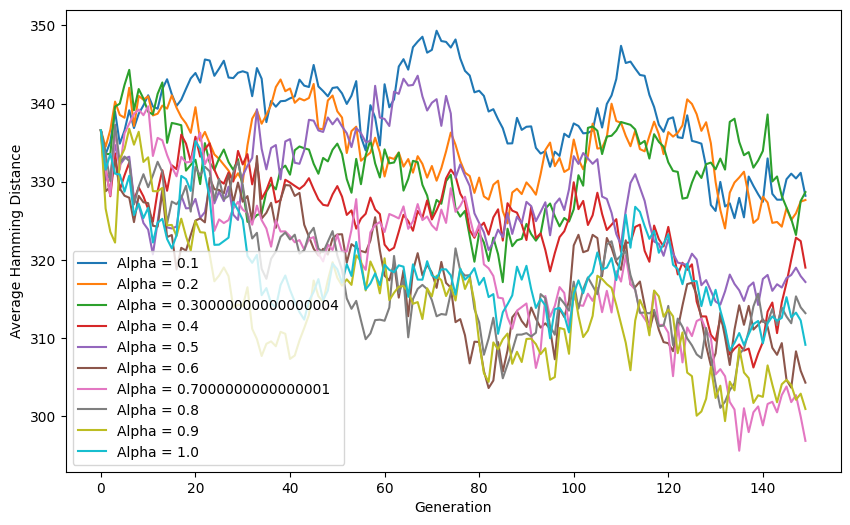

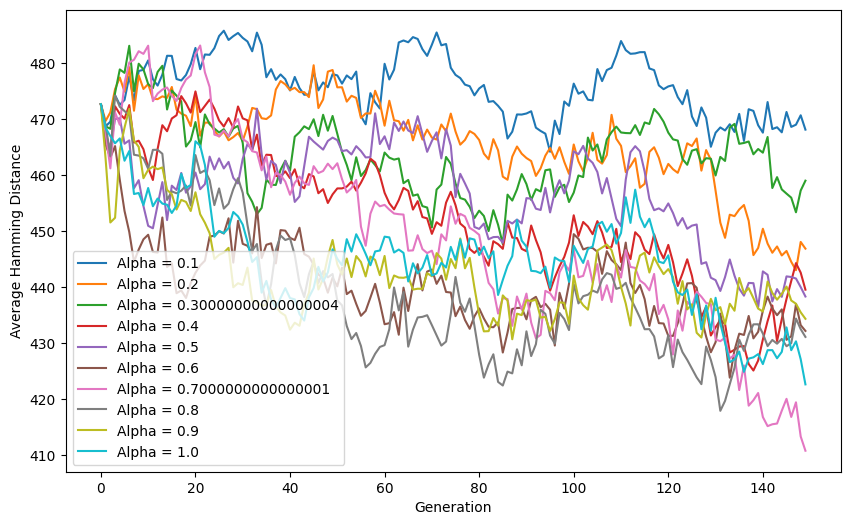

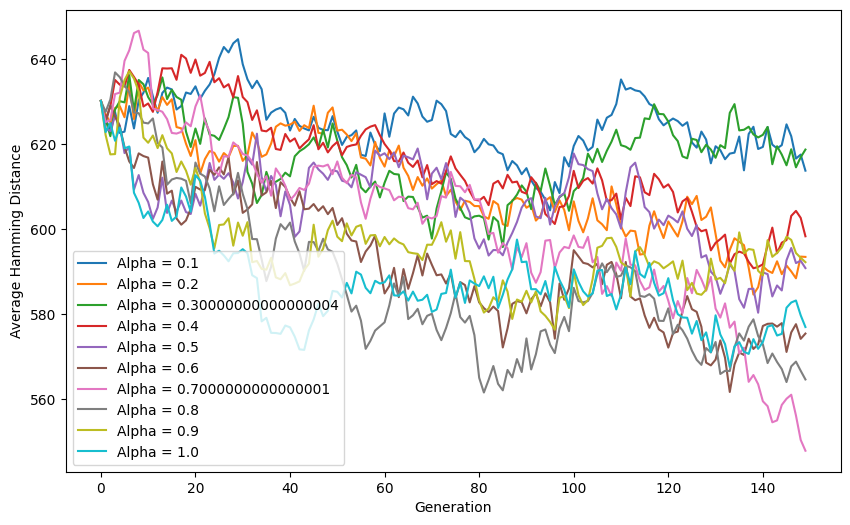

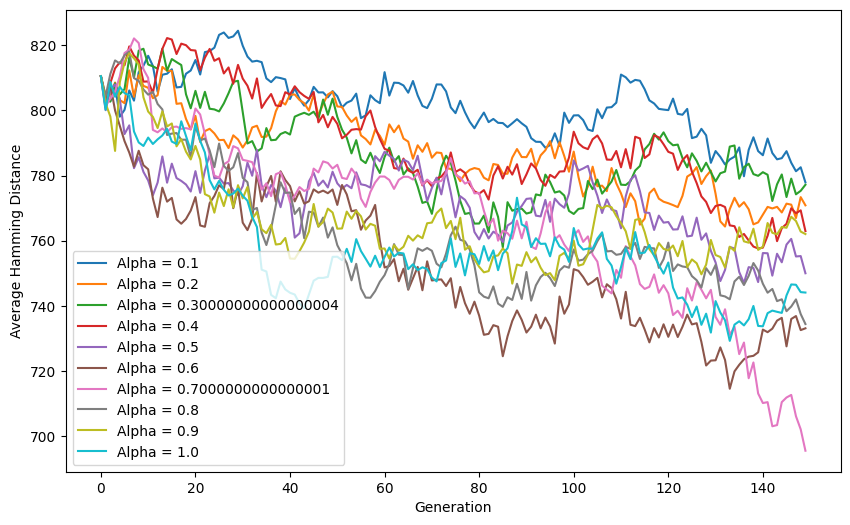

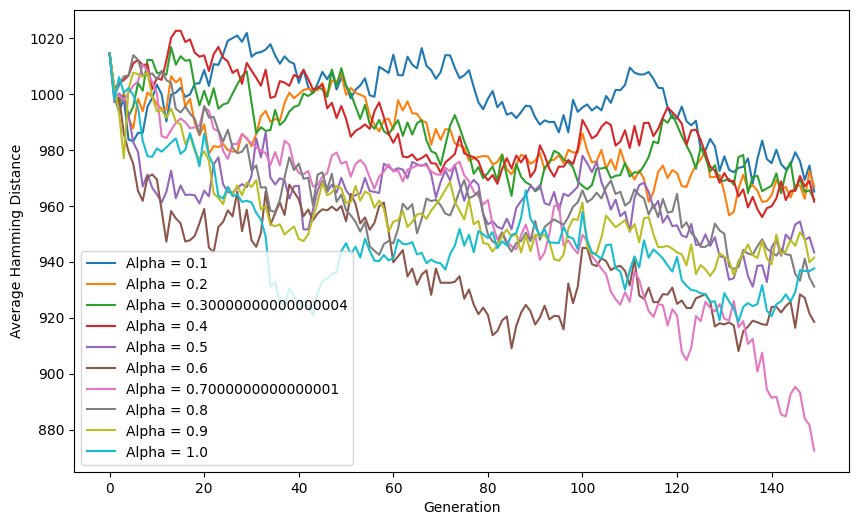

In [6]:
# For target_expression 0.5
target_expression = 0.5

for lineages in lineage_range:
    data = []
    for lineage_divergence_alpha in lineage_divergence_alpha_range:
        infill_history = infill_histories[lineages][target_expression][lineage_divergence_alpha]
        data.append(calculate_intra_lineage_hamm(infill_history))
    plot_intra_hamm_comparison(data, lineage_divergence_alpha_range)

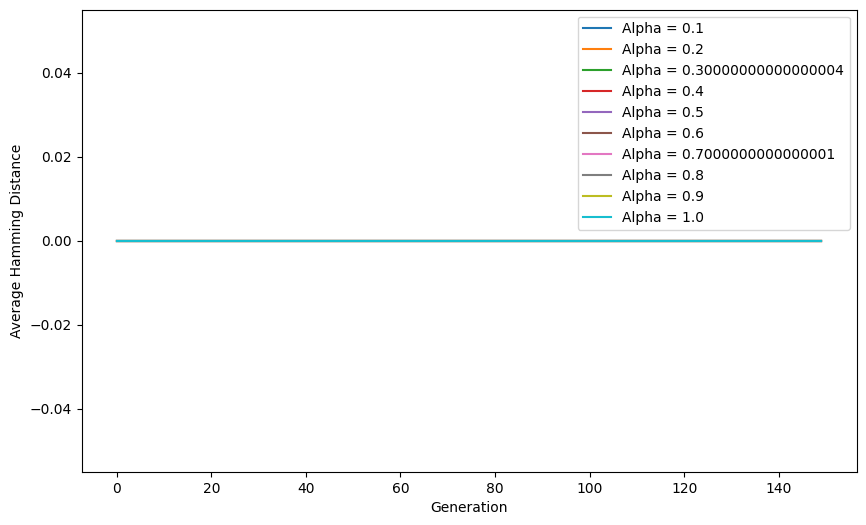

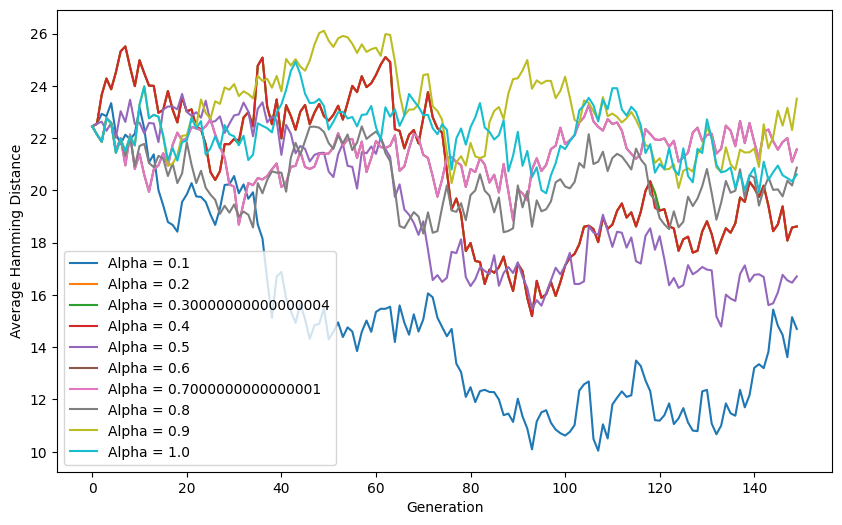

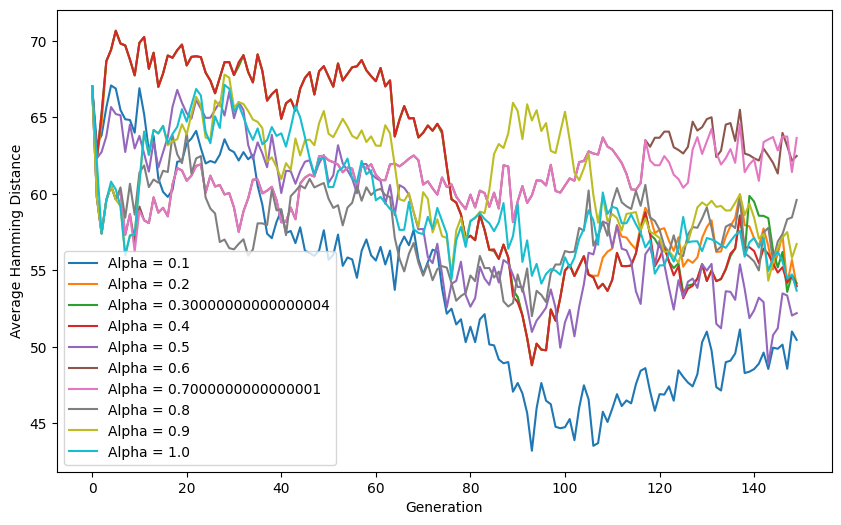

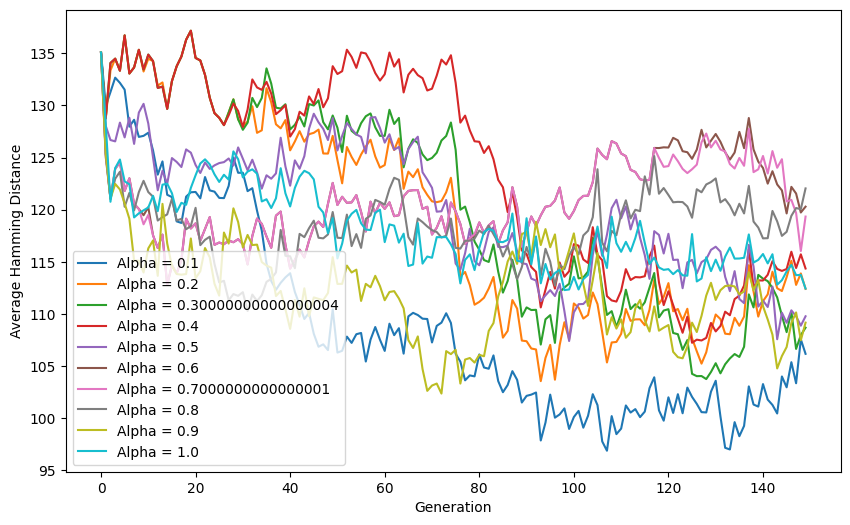

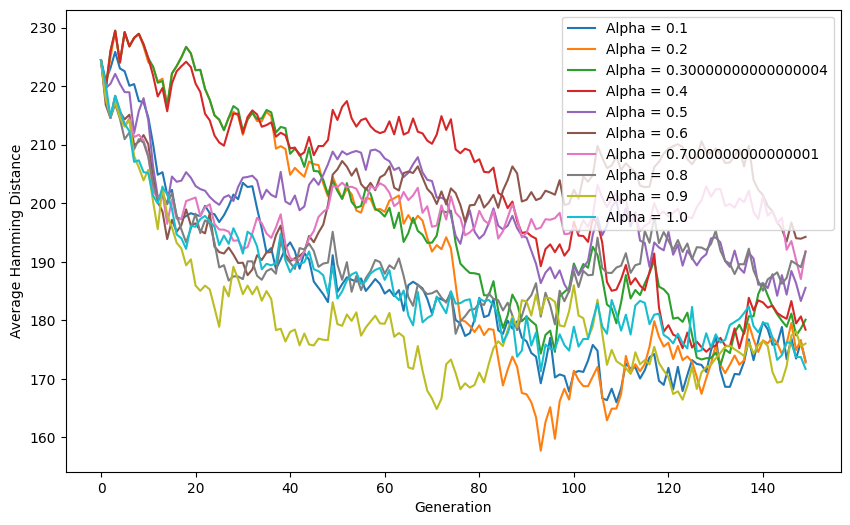

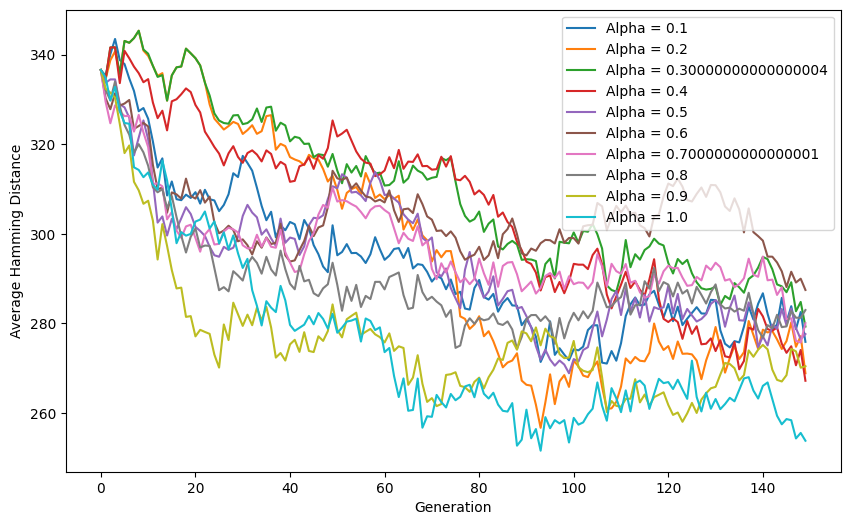

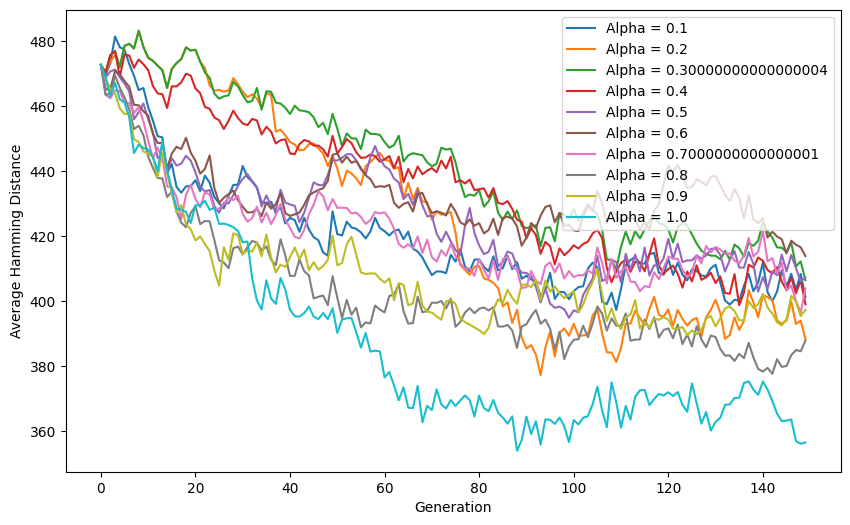

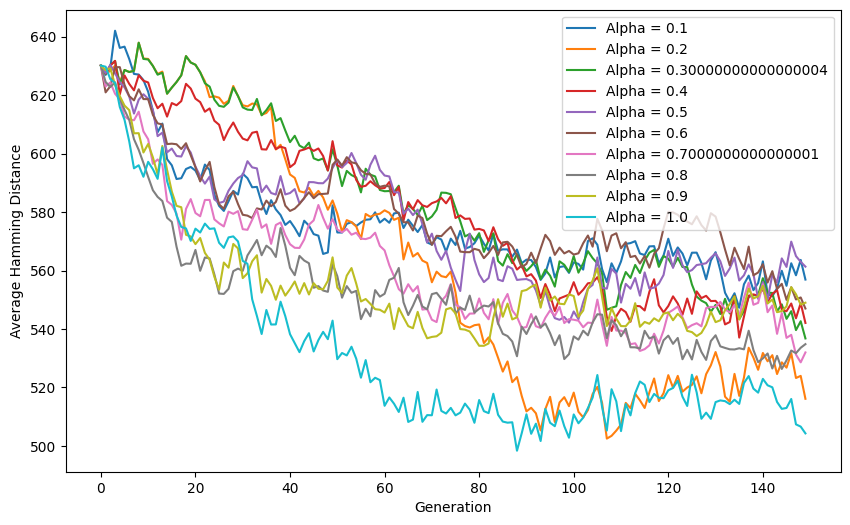

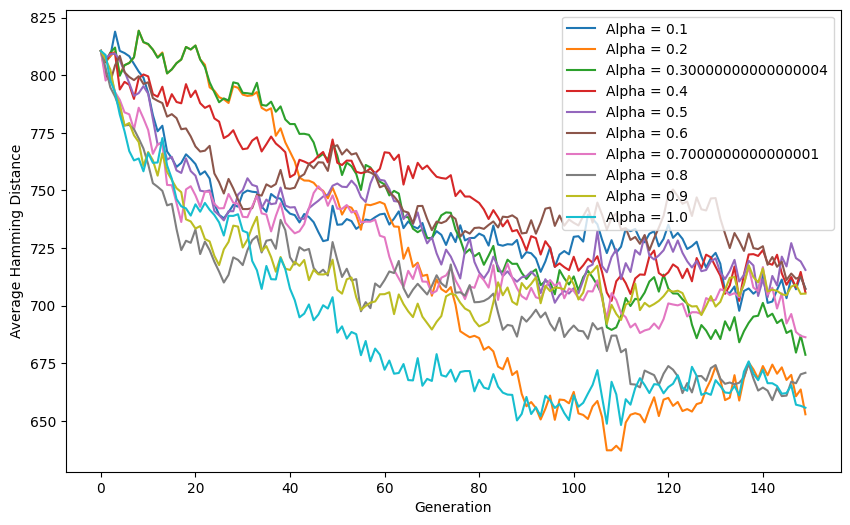

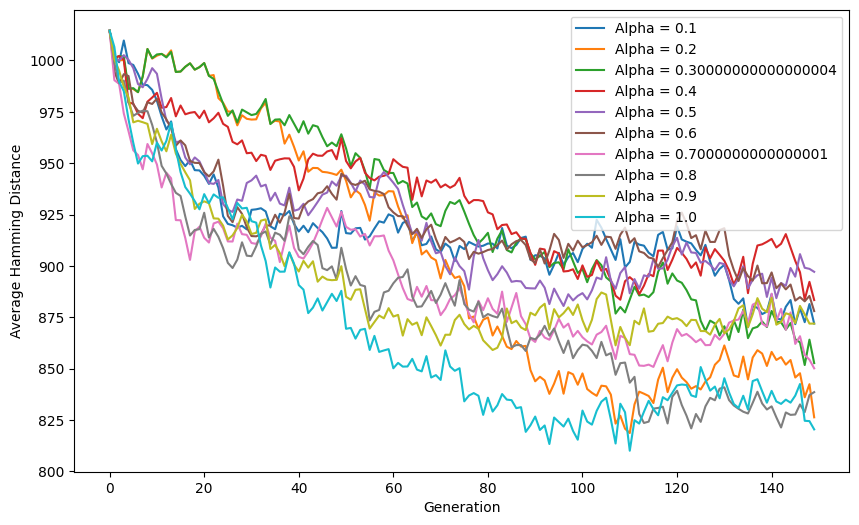

In [7]:
# For target_expression 1
target_expression = 1

for lineages in lineage_range:
    data = []
    for lineage_divergence_alpha in lineage_divergence_alpha_range:
        infill_history = infill_histories[lineages][target_expression][lineage_divergence_alpha]
        data.append(calculate_intra_lineage_hamm(infill_history))
    plot_intra_hamm_comparison(data, lineage_divergence_alpha_range)